<a href="https://colab.research.google.com/github/bipinKrishnan/fastai_course/blob/master/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import torch
from torchvision import models
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from tqdm.notebook import tqdm

In [196]:
!rm -r $path/.ipynb_checkpoints

rm: cannot remove '/content/bear/.ipynb_checkpoints': No such file or directory


In [197]:
path = '/content/bear'
target = {0: "Black bear", 1: "Grizzly bear", 2: "Teddy bear"}
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [200]:
def load_dataset(path=path, bs=1, transform=transform, train=True):
  imgs = ImageFolder(root=path, transform=transform)

  dataloader = DataLoader(imgs, bs, shuffle=train)

  return dataloader

def show_batch(dataloader, rows, cols):
  
  for i, (img, label) in enumerate(dataloader):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))
    plt.title(target[label[0].item()])
    plt.xticks([])
    plt.yticks([])

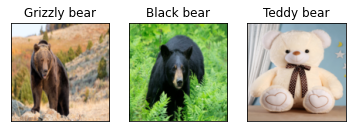

In [201]:
trainloader = load_dataset()
show_batch(trainloader, 1, 3)

In [210]:
model = models.resnet18(pretrained=True)

In [211]:
for params in model.parameters():
  params.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 3)

In [212]:
criterion = torch.nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

In [213]:
epochs = 50

model.train()
for epoch in tqdm(range(epochs), total=epochs):
  for img, label in trainloader:
    opt.zero_grad()

    out = model(img)

    loss = criterion(out, label)

    loss.backward()

    opt.step()
  print("Epoch: {}  Loss: {}".format(epoch+1, loss.item()))

Epoch: 1  Loss: 2.524935245513916
Epoch: 2  Loss: 1.47915780544281
Epoch: 3  Loss: 0.979608416557312
Epoch: 4  Loss: 1.765559434890747
Epoch: 5  Loss: 2.8272082805633545
Epoch: 6  Loss: 4.070287704467773
Epoch: 7  Loss: 2.805382251739502
Epoch: 8  Loss: 2.6063835620880127
Epoch: 9  Loss: 1.6863129138946533
Epoch: 10  Loss: 0.5874850749969482
Epoch: 11  Loss: 1.5823009014129639
Epoch: 12  Loss: 0.8635851144790649
Epoch: 13  Loss: 1.0072128772735596
Epoch: 14  Loss: 2.395254373550415
Epoch: 15  Loss: 0.7971664071083069
Epoch: 16  Loss: 0.8302604556083679
Epoch: 17  Loss: 1.4497296810150146
Epoch: 18  Loss: 1.9097826480865479
Epoch: 19  Loss: 4.317670822143555
Epoch: 20  Loss: 0.4429343342781067
Epoch: 21  Loss: 0.46583178639411926
Epoch: 22  Loss: 1.6839985847473145
Epoch: 23  Loss: 0.6117283701896667
Epoch: 24  Loss: 0.43496593832969666
Epoch: 25  Loss: 0.7718732953071594
Epoch: 26  Loss: 2.8239152431488037
Epoch: 27  Loss: 0.7041113376617432
Epoch: 28  Loss: 3.042675733566284
Epoch: 29

In [216]:
model.eval()
test_img = Image.open('/content/bear/grizzly/grizzly_bear.jpg')
test_img = transform(test_img)
target[torch.max(model(test_img.unsqueeze(0)), 1)[1].item()]

'Grizzly bear'